In [2]:
from fastai.vision.all import *

path = Path('military_aircraft/crop/')
searches = 'C5','C17'

/home/andre/.cache/pypoetry/virtualenvs/military-detection-3ZlVuL9_-py3.12/lib/python3.12/site-packages/fastai/learner.py:450: SyntaxWarning: invalid escape sequence '\R'
  e.args = [f"Custom classes or functions exported with your `Learner` not available in namespace.\Re-declare/import before loading:\n\t{e.args[0]}"]


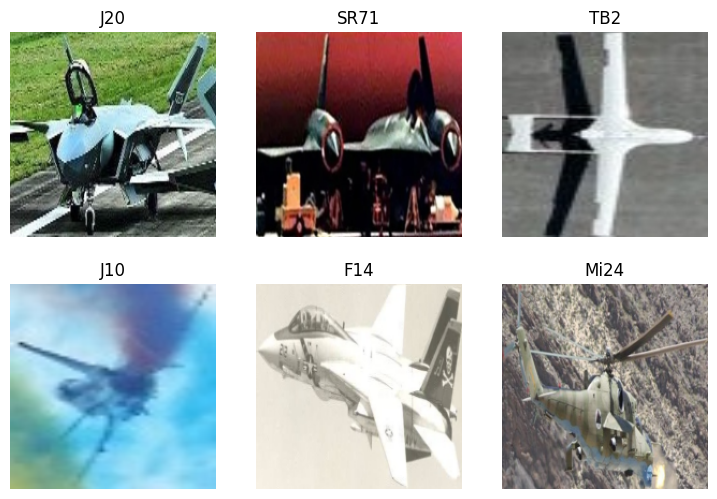

In [3]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

In [26]:
is_plane,_,probs = learn.predict(PILImage.create('f18.jpeg'))
print(f"This is a: {is_plane}.")
print(f"Probability : {probs[0]:.4f}")

This is a: F18.
Probability : 0.0000


In [29]:
img = PILImage.create('f18.jpeg')

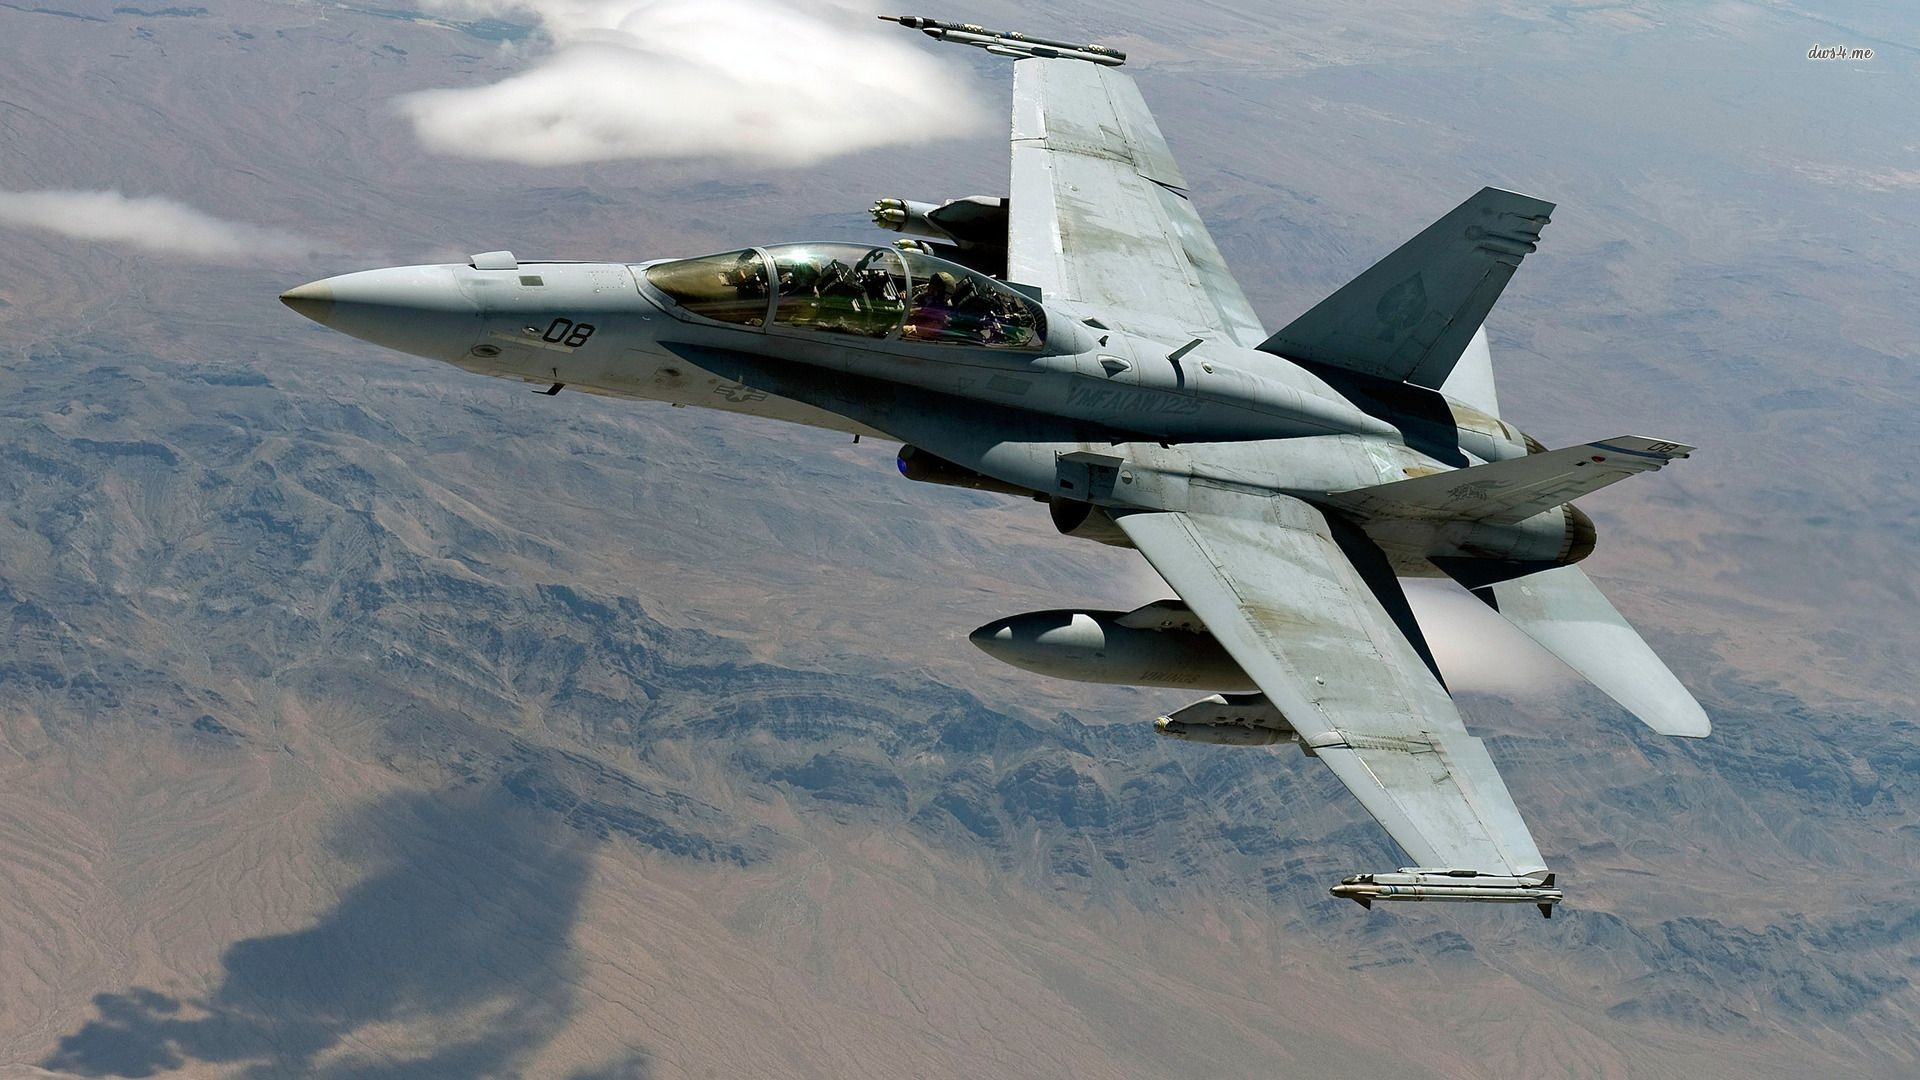

In [30]:
img

In [31]:
img = PILImage.create('c17.jpg')

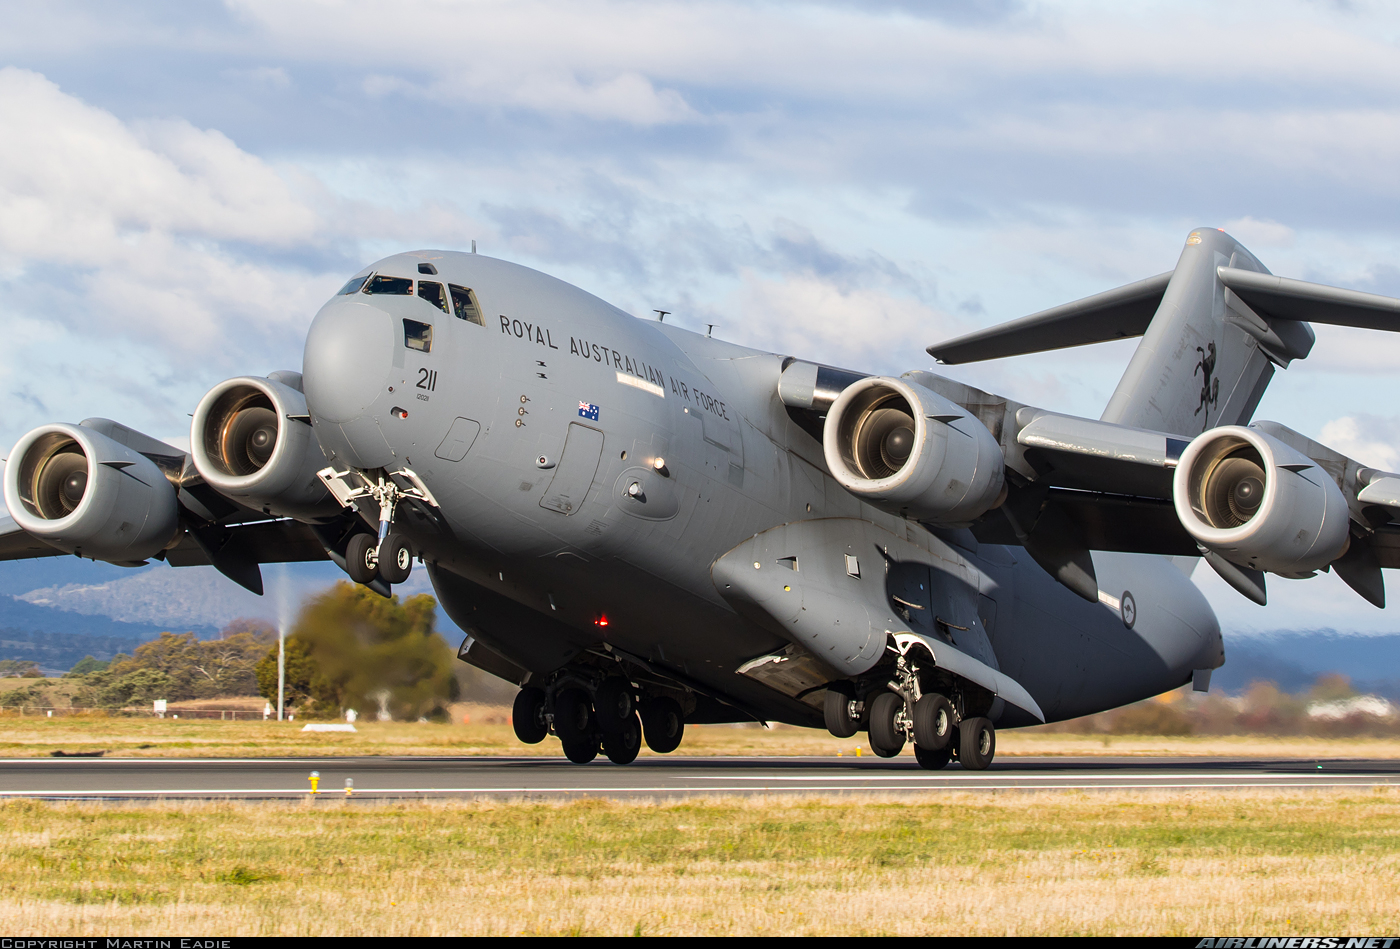

In [32]:
img

In [33]:
is_plane,_,probs = learn.predict(img)
print(f"This is a: {is_plane}.")
print(f"Probability : {probs[0]:.4f}")

This is a: C17.
Probability : 0.0052


In [37]:
img = PILImage.create('c5.jpg')

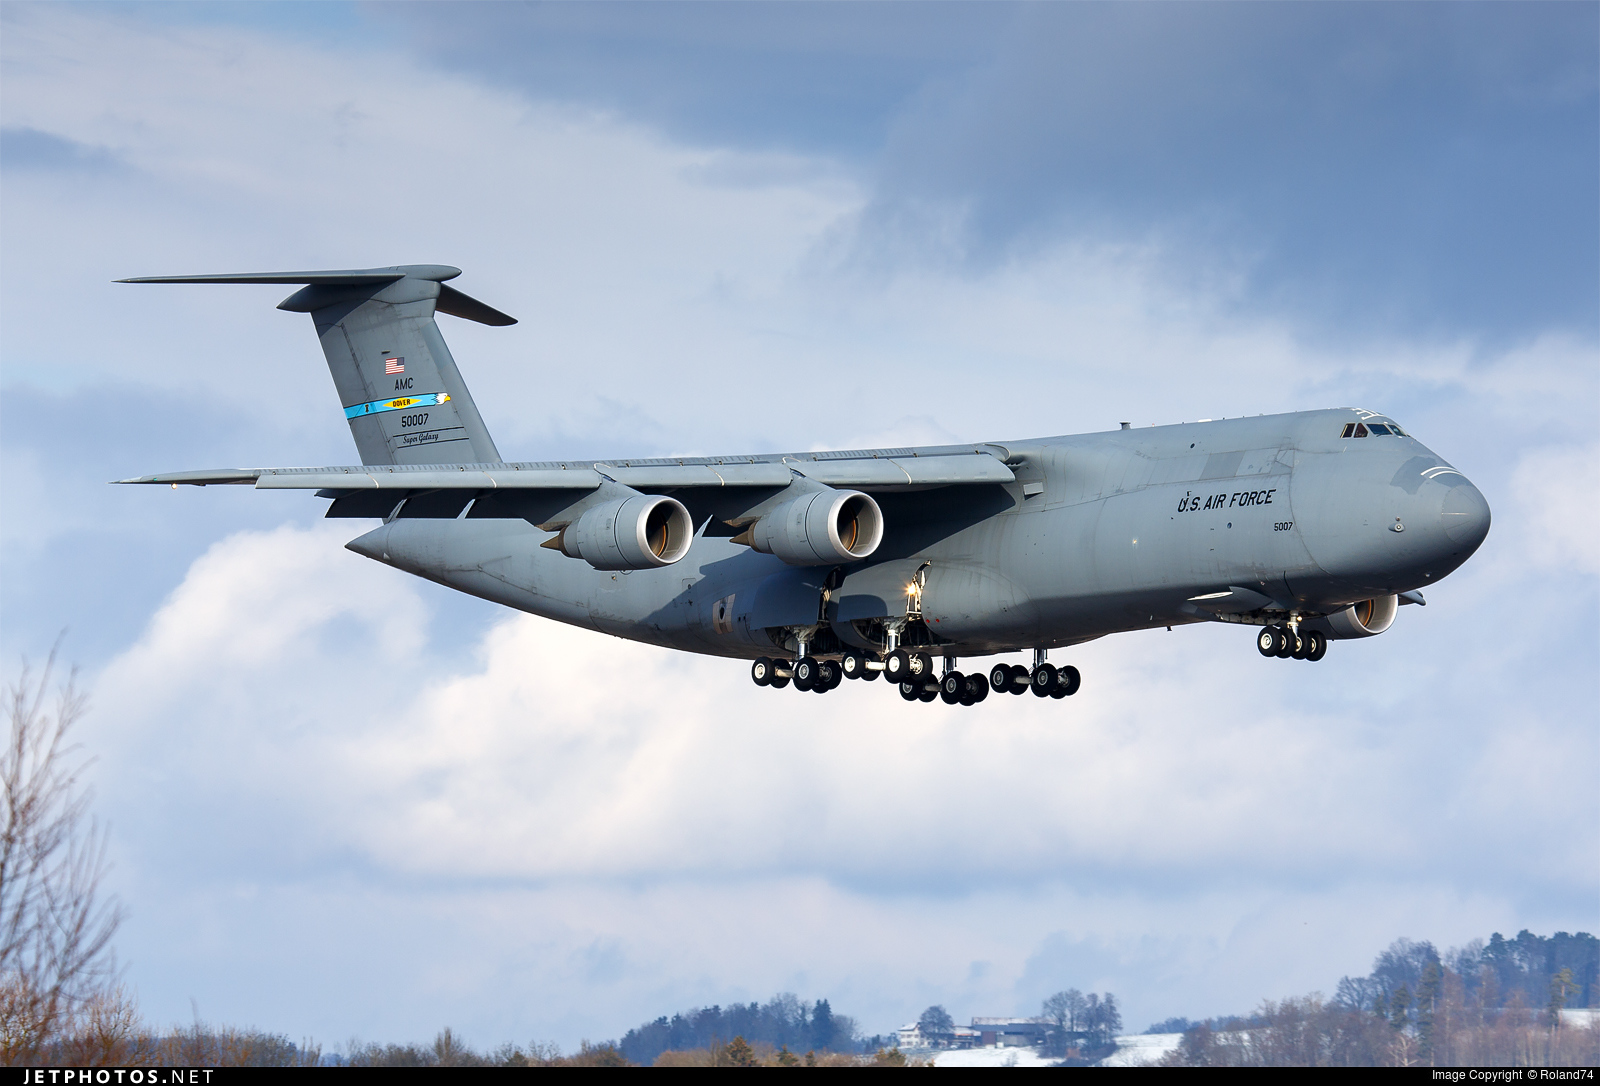

In [38]:
img

In [39]:
is_plane,_,probs = learn.predict(img)
print(f"This is a: {is_plane}.")
print(f"Probability : {probs[0]:.4f}")

This is a: C5.
Probability : 0.0001
